In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
q1_stats_2016 = pd.read_csv("./data/LoanStats_2016Q1.csv", low_memory=False, skiprows=1)

In [3]:
q1_stats_2016.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12800.0,12800.0,12800.0,36 months,11.99%,425.09,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5625.0,5625.0,5625.0,36 months,18.25%,204.07,D,D3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,16000.0,16000.0,16000.0,60 months,9.75%,337.99,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,9000.0,9000.0,9000.0,36 months,15.31%,313.36,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12025.0,12025.0,12025.0,36 months,14.46%,413.68,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
q1_stats_2016.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,133887.000000,133887.000000,133887.000000,133887.000000,1.338870e+05,0.0,133870.000000,133887.000000,133886.000000,...,1291.0,1291.000000,1291.0,1291.000000,995.000000,1291.000000,1291.000000,4179.000000,4179.000000,4179.000000
mean,NaN,15589.394041,15589.394041,15581.984023,460.854092,8.046397e+04,NaN,19.547033,0.343476,0.576498,...,3.0,146.015383,3.0,14.017816,424.560874,11055.795275,188.488559,4975.319763,47.312587,14.011965
std,NaN,8858.198349,8858.198349,8856.454888,261.617878,7.808478e+04,NaN,9.966931,0.908581,0.878987,...,0.0,114.265750,0.0,9.547782,334.800748,6624.170686,194.954796,3654.047030,5.841594,7.311594
min,NaN,1000.000000,1000.000000,775.000000,19.400000,0.000000e+00,NaN,-1.000000,0.000000,0.000000,...,3.0,4.470000,3.0,0.000000,13.410000,397.900000,0.010000,150.000000,20.000000,0.000000
25%,NaN,8400.000000,8400.000000,8400.000000,265.680000,4.950000e+04,NaN,12.640000,0.000000,0.000000,...,3.0,57.960000,3.0,7.000000,168.000000,5702.695000,42.765000,2074.000000,45.000000,10.000000
50%,NaN,14400.000000,14400.000000,14400.000000,398.520000,6.800000e+04,NaN,18.760000,0.000000,0.000000,...,3.0,114.200000,3.0,15.000000,328.590000,10090.240000,126.820000,4196.000000,45.000000,15.000000
75%,NaN,21000.000000,21000.000000,21000.000000,613.910000,9.500800e+04,NaN,25.770000,0.000000,1.000000,...,3.0,204.320000,3.0,23.000000,586.140000,15469.450000,270.335000,6911.545000,50.000000,18.000000
max,NaN,40000.000000,40000.000000,40000.000000,1536.950000,9.550000e+06,NaN,999.000000,22.000000,5.000000,...,3.0,650.090000,3.0,32.000000,1889.970000,32348.480000,1407.860000,23895.910000,90.000000,65.000000


## Remove Columns with Null Data
<p>Based on the description above, a few columns have null information in regards to the loan statistics. We are going to examine each column further to determine which columns can be removed. From our initial glance, it is evident that the member_id and url columns can be removed.</p>
<p>In order to determine which columns will be dropped, we'll have some threshold that determines whether or not a column should be removed. This thresehold value will be in range(0, 1). If a particular column has  at least &lt;threshold&gt;% of values null, we drop the column. </p>
<p>Additional information regarding the columns can be found <a href="https://www.lendingclub.com/info/download-data.action">here</a></p>

In [5]:
drop_columns = ["id", "member_id", "url"]
q1_stats_2016 = q1_stats_2016.drop(drop_columns, axis="columns")

In [6]:
threshold = .2
columns = q1_stats_2016.columns

# Examine on a per column basis
for c in columns:
    column = q1_stats_2016[c]
    null_ratio = column[column.isnull()].shape[0] / column.shape[0]
    if null_ratio >= threshold:
        q1_stats_2016 = q1_stats_2016.drop(c, axis="columns")
    # print(f"Column {c} Null Ratio: {null_ratio}")

### Dataframe after the Purge
<p>Play around with the threshold value to find a value suitable to your needs. My primary focus is to reduce memory usage. The cell below gives a description of the columns that were removed and the resulting  shape of our dataframe.</p>

In [7]:
dropped_columns = set(columns).difference(set(q1_stats_2016.columns))
print(f"Shape: {q1_stats_2016.shape}")
print("Dropped Columns:")
for dc in dropped_columns:
    print(dc)

Shape: (133889, 100)
Dropped Columns:
hardship_status
mths_since_recent_bc_dlq
dti_joint
settlement_amount
sec_app_chargeoff_within_12_mths
deferral_term
hardship_payoff_balance_amount
sec_app_inq_last_6mths
sec_app_mths_since_last_major_derog
sec_app_num_rev_accts
sec_app_open_act_il
hardship_last_payment_amount
hardship_start_date
sec_app_collections_12_mths_ex_med
mths_since_last_delinq
hardship_amount
mths_since_last_major_derog
payment_plan_start_date
settlement_date
mths_since_last_record
hardship_type
sec_app_revol_util
debt_settlement_flag_date
sec_app_mort_acc
verification_status_joint
hardship_dpd
next_pymnt_d
hardship_length
hardship_end_date
orig_projected_additional_accrued_interest
hardship_loan_status
annual_inc_joint
revol_bal_joint
settlement_status
sec_app_open_acc
settlement_percentage
hardship_reason
desc
mths_since_recent_revol_delinq
settlement_term
sec_app_earliest_cr_line


In [8]:
q1_stats_2016.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,133887.000000,133887.000000,133887.000000,133887.000000,1.338870e+05,133870.000000,133887.000000,133886.000000,133887.000000,133887.000000,...,133887.000000,133887.000000,133887.000000,132758.000000,133887.000000,133887.000000,1.338870e+05,1.338870e+05,1.338870e+05,1.338870e+05
mean,15589.394041,15589.394041,15581.984023,460.854092,8.046397e+04,19.547033,0.343476,0.576498,12.119922,0.238709,...,0.090614,2.248732,94.061616,44.558212,0.130476,0.071172,1.838938e+05,5.412411e+04,2.372274e+04,4.563367e+04
std,8858.198349,8858.198349,8856.454888,261.617878,7.808478e+04,9.966931,0.908581,0.878987,5.762491,0.664568,...,0.506937,1.930450,8.753232,36.039386,0.383625,0.464207,1.870034e+05,4.999403e+04,2.332594e+04,4.552498e+04
min,1000.000000,1000.000000,775.000000,19.400000,0.000000e+00,-1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,8400.000000,8400.000000,8400.000000,265.680000,4.950000e+04,12.640000,0.000000,0.000000,8.000000,0.000000,...,0.000000,1.000000,91.100000,10.000000,0.000000,0.000000,5.422000e+04,2.330500e+04,8.600000e+03,1.658500e+04
50%,14400.000000,14400.000000,14400.000000,398.520000,6.800000e+04,18.760000,0.000000,0.000000,11.000000,0.000000,...,0.000000,2.000000,97.500000,40.000000,0.000000,0.000000,1.212010e+05,4.101600e+04,1.670000e+04,3.462200e+04
75%,21000.000000,21000.000000,21000.000000,613.910000,9.500800e+04,25.770000,0.000000,1.000000,15.000000,0.000000,...,0.000000,3.000000,100.000000,75.000000,0.000000,0.000000,2.635540e+05,6.846750e+04,3.100000e+04,6.125800e+04
max,40000.000000,40000.000000,40000.000000,1536.950000,9.550000e+06,999.000000,22.000000,5.000000,74.000000,46.000000,...,22.000000,31.000000,100.000000,100.000000,9.000000,45.000000,9.999999e+06,1.034841e+06,1.105500e+06,1.183946e+06


## Fully Paid Loans...a.k.a PAID IN FULL :)
<img src="./img/mitch.jpeg">
<p>Now I'd like to see what some of the characteristic of paid off loans have in common. If the image above doesn't stand out to you, please do me a favor and watch the movie "Paid In Full." Any ways, with the help of Money Makin' Mitch and some good ole Python, we are going to separate from our data the loans that have been paid in full.</p>
<p>Keep in mind the dataframe for the loans that have been fully paid are fully paid! Thus, we can drop the loan_status column from our dataframe. I also noticed that the loans that have been paid in full have equivalent values for loan_amnt and funded_amnt, therefore one of the columns may be dropped as well</p>


In [ ]:
drop_from_paid = ["loan_status", "loan_amnt"]
paid_in_full = q1_stats_2016[q1_stats_2016["loan_status"] == "Fully Paid"].drop(drop_from_paid, axis="columns")

In [ ]:
paid_in_full["total_pymnt"].head()# == paid_in_full["funded_amnt"]

0    15289.811232
1     7235.031678
3    10193.651743
4    14873.057519
5    13662.784156
Name: total_pymnt, dtype: float64

In [ ]:
paid_in_full["funded_amnt"].head()

0    12800.0
1     5625.0
3     9000.0
4    12025.0
5    11275.0
Name: funded_amnt, dtype: float64

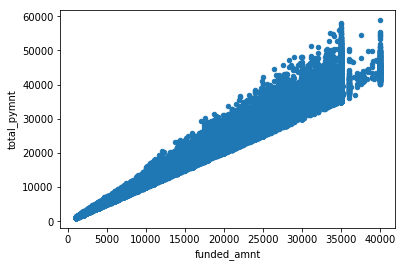

In [ ]:
paid_in_full.plot(kind="scatter", x="funded_amnt", y="total_pymnt")

In [ ]:
paid_in_full["inv_profit"] = paid_in_full["total_pymnt"] - paid_in_full["funded_amnt"]

In [ ]:
paid_in_full["inv_profit"].describe()

count    95484.000000
mean      2236.290811
std       2127.266129
min          0.000000
25%        849.117405
50%       1585.735904
75%       2880.010984
max      23028.486351
Name: inv_profit, dtype: float64

## Which grade loans perform the best, i.e. yield the most profit? Which sub grade loans perform the best?

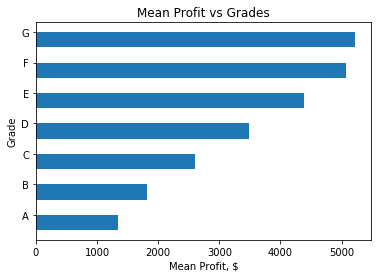

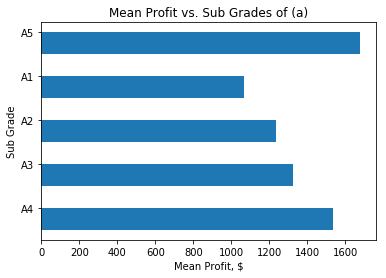

In [ ]:
def bar_plot_by_subgrade(df, grade):
    fig, ax = plt.subplots()
    sub_grades = [sg for sg in df["sub_grade"].unique() if grade.upper() in sg]
    sgrade_positions = np.arange( len(sub_grades) ) + .75
    tick_positions = range(1, len(sub_grades) + 1)
    
    sgrade_widths = []
    for sgr in sub_grades:
        sgrade = df.loc[df["sub_grade"] == sgr, "inv_profit"]
        sgrade_mean = sgrade.mean()
        sgrade_widths.append( int(sgrade_mean) )
        
    ax.barh(sgrade_positions, sgrade_widths, 0.5)
    ax.set_yticks(tick_positions)
    ax.set_yticklabels(sub_grades)
    ax.set_ylabel("Sub Grade")
    ax.set_xlabel("Mean Profit, $")
    ax.set_title(f"Mean Profit vs. Sub Grades of ({grade})")
    
    plt.show()


def bar_plot_by_grade(df):
    fig, ax = plt.subplots()
    grades = list(sorted(df["grade"].unique()))
    grade_positions = np.arange( len(grades) ) + .75
    tick_positions = range(1, len(grades) + 1)

    grade_widths = []
    for gr in grades:
        grade = df.loc[df["grade"] == gr, "inv_profit"]
        grade_mean = grade.mean()
        grade_widths.append( int(grade_mean) )

    
    ax.barh(grade_positions, grade_widths, 0.5)
    ax.set_yticks(tick_positions)
    ax.set_yticklabels(grades)
    ax.set_ylabel("Grade")
    ax.set_xlabel("Mean Profit, $")
    ax.set_title("Mean Profit vs Grades")
    
    plt.show()

bar_plot_by_grade(paid_in_full)
bar_plot_by_subgrade(paid_in_full, "a")
# for grade in paid_in_full["grade"].unique():
#     bar_plot_by_subgrade(paid_in_full, grade)

## Observances
<p>The above shows that the average profit obtained increased the lower the grade on the loan, which was expected since the interest rate of lower quality loans tend to be higher. From a surface level inspection, this looks as if loans of lower quality perform better, but we have to keep in mind that these are the loans that are paid off. Some questions to consider:</p>
<ul>
    <li>What ratio of paid in full loans belong to each category?</li>
    <li>Which category of loans has the highest expected value?</li>
</ul>
<p>Observing the profits across sub grade also informs us that each sub grade performs relatively the same, therefore adjusting your investments for sub grade quality will not yield significant changes.</p>

### Calculating the expected value of loans by grade

In [ ]:
mean_grade_profit = []

grades = sorted(paid_in_full["grade"].unique())
for gr in grades:
    grade = paid_in_full.loc[paid_in_full["grade"] == gr, "inv_profit"]
    grade_mean = grade.mean()
    mean_grade_profit.append( int(grade_mean) )
    
mean_grade_profit = pd.Series(mean_grade_profit, index=grades)

print(paid_in_full["grade"].value_counts(normalize=True))
ev_loan_grade = paid_in_full["grade"].value_counts(normalize=True) * mean_grade_profit
best_loan_class = ev_loan_grade.idxmax()

print(
    f"The grade that peforms the best, in expectation, are the class of loans {best_loan_class}.\n",
    ev_loan_grade,
    sep='\n'
)

B    0.332108
C    0.253362
A    0.252000
D    0.097922
E    0.046563
F    0.014547
G    0.003498
Name: grade, dtype: float64
The grade that peforms the best, in expectation, are the class of loans C.

A    336.924448
B    600.783367
C    660.007541
D    341.552511
E    204.550270
F     73.767532
G     18.248900
dtype: float64


In [ ]:
paid_in_full["inv_profit"].shape

(95484,)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

pif_numerical = paid_in_full.select_dtypes(include=["float"])

X = pif_numerical.loc[:, pif_numerical.columns != "inv_profit"]
y = pif_numerical.loc[:, pif_numerical.columns == "inv_profit"].astype(int)

X_cols = X.isnull().any()
for col in X_cols.keys():
    if X_cols[col]:
        X.drop(col, axis="columns", inplace=True)

# X = X.astype(int)
        
res = SelectKBest(chi2, k=25)
res.fit(X.values, y.values)
cols = res.get_support(indices=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp


In [ ]:
X.columns.get_values()[cols]

array(['funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc',
       'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'avg_cur_bal', 'delinq_amnt',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'num_il_tl', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'total_bc_limit', 'total_il_high_credit_limit'], dtype=object)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X.values, y.values)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
print(model.feature_importances_)